# Cell-Cell interaction Analysis using NCEM  
### Spatial pancreas  
Subset of a non-diabetic slide (fov == 12) 

### Pre-requisites

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

import scanpy as sc
import squidpy as sq
import ncem as nc

import matplotlib.pyplot as plt

sc.settings.set_figure_params(dpi=80, facecolor="white")

2024-07-23 13:45:08.527646: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-23 13:45:08.741512: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-23 13:45:12.797194: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-23 13:45:19.279663: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-23 13:45:47.823761: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:
nc.__version__

'0.1.5'

### Load data

In [3]:
adata_s1 = sc.read('../../../../../../datasets/projects/20230301_Sander_SpatialPancreas_sara.jimenez/spatial/S1_annotated_l0.h5ad')
adata_s1

/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 108711 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse'
    var: 'NegPrb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'log1p', 'spatial'
    obsm: 'spatial', 'spatial_fov'
    layers: 'counts'

In [4]:
adata = adata_s1[np.isin(adata_s1.obs['fov'],['12'])].copy()
adata

AnnData object with n_obs × n_vars = 5208 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse'
    var: 'NegPrb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'log1p', 'spatial'
    obsm: 'spatial', 'spatial_fov'
    layers: 'counts'

In [5]:
adata.obs['cell_type_coarse'].cat.categories

Index(['Acinar', 'Alpha', 'Beta', 'Ductal', 'Endocrine', 'Endothelial',
       'Fibroblasts', 'Immune', 'Mast'],
      dtype='object')

In [6]:
adata.uns['cell_type_coarse_colors'] = [
    '#edd892', #acinar
    '#219ebc', #alpha
    '#adc178', #beta
    '#f79824', #ductal
    '#718355', #endocrine
    '#f15156', #endothelial
    '#bbd0ff', #Fibroblasts
    '#979dac', #Immune
    '#582f0e'  #mast
]

### Data Exploration

/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


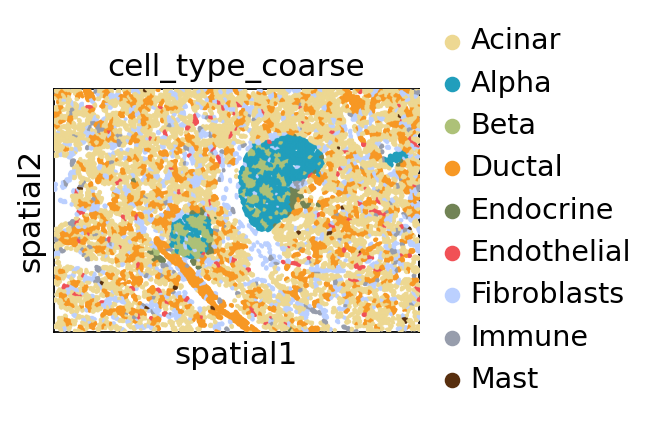

In [7]:
sq.pl.spatial_segment(adata,color='cell_type_coarse',ncols=2,
                      library_key='fov', seg_cell_id='cell_ID',cmap='RdYlBu_r', img=False)

In [8]:
from matplotlib.pyplot import rc_context

In [ ]:
HORMONES = ['INS','GCG','SST']
#adata.uns['cell_type_coarse_colors'] = ['#00bbf9', '#a7c957', '#F4BA41', '#e63946', '#6c757d', '#ffcdb2','#fb8500']

In [ ]:
# Check expression of known markers to get intuition of the dataset
with rc_context({'figure.figsize': (10.5,7)}):
    sc.pl.embedding(
        adata,
        basis='spatial',
        color=HORMONES,
        vmin=0,
        vmax='p99',  
        sort_order=False,  
        frameon=False,
        cmap='RdYlBu_r', 
        size=150,ncols=3
    )

In [13]:
type(adata.X)

scipy.sparse._csr.csr_matrix

In [9]:
adata.X = adata.X.toarray()

1. Noise distribution of the dataset per cell type 
- NCEM requires gaussian distribution not negative binomial 
- Important not to overnormalized -> the 

Acinar
Alpha
Beta
Ductal
Endocrine
Endothelial
Fibroblasts
Immune
Mast


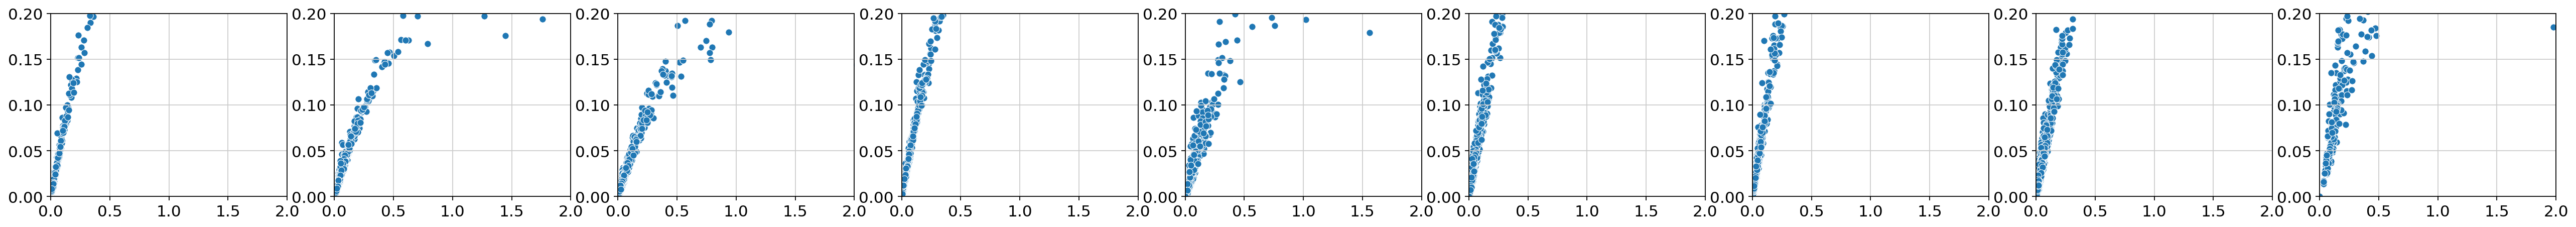

In [10]:
fig, ax = plt.subplots(1,len(np.unique(adata.obs['cell_type_coarse'])), figsize=(40,3))
for i, ct in enumerate(np.unique(adata.obs['cell_type_coarse'])):
    print(ct)
    mean = np.mean(adata[adata.obs['cell_type_coarse']==ct].X, axis=0)
    var = np.var(adata[adata.obs['cell_type_coarse']==ct].X, axis=0)
    g=sns.scatterplot(x=mean, y=var, ax=ax[i])
    g.set(ylim=(0, 0.2), xlim=(0,2))

In [11]:
adata.obs['cell_type_coarse'].cat.categories

Index(['Acinar', 'Alpha', 'Beta', 'Ductal', 'Endocrine', 'Endothelial',
       'Fibroblasts', 'Immune', 'Mast'],
      dtype='object')

### Pre-processing

In [12]:
adata.X.max()

4.3965755

In [13]:
adata.layers['counts'].max()

177

#### the data seems normalized
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
adata.X

In [8]:
# calculating node degree for several distances 
for rd in [0,35,50,110,180,500]:
    connectivities, _ = sq.gr.spatial_neighbors(
        adata, radius=rd, coord_type='generic', copy=True
    )
    print(np.mean(np.sum(connectivities, axis=0)))

0.0
0.23732718894009217
1.2645929339477726
9.872119815668203
26.92089093701997
192.69009216589862


In [14]:
sq.gr.spatial_neighbors(
    adata,
    n_neighs=50,
    coord_type="generic",
    delaunay=True,
)

/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/squidpy/pl/_color_utils.py:27: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


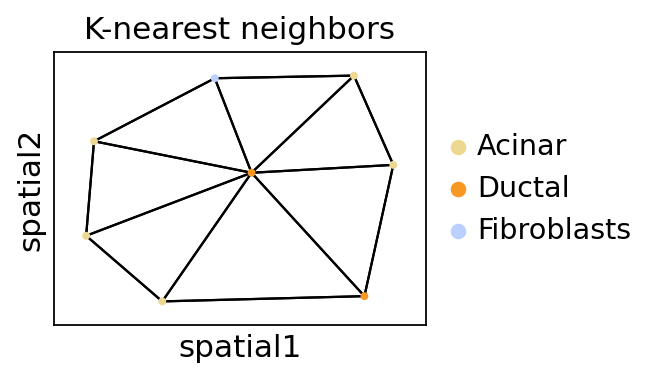

In [15]:
_, idx = adata.obsp["spatial_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(
    adata[idx,420],
    library_id = '12',
    color="cell_type_coarse",
    connectivity_key="spatial_connectivities",
    size=3,
    edges_width=1,
    edges_color="black",
    img=False,
    title="K-nearest neighbors"
)

### Neighbors enrichment analysis

In [16]:
sq.gr.nhood_enrichment(adata,cluster_key='cell_type_coarse')

100%|██████████| 1000/1000 [00:00<00:00, 1209.37/s]


/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/squidpy/pl/_utils.py:557: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_labels = adata.obs[key][row_order]


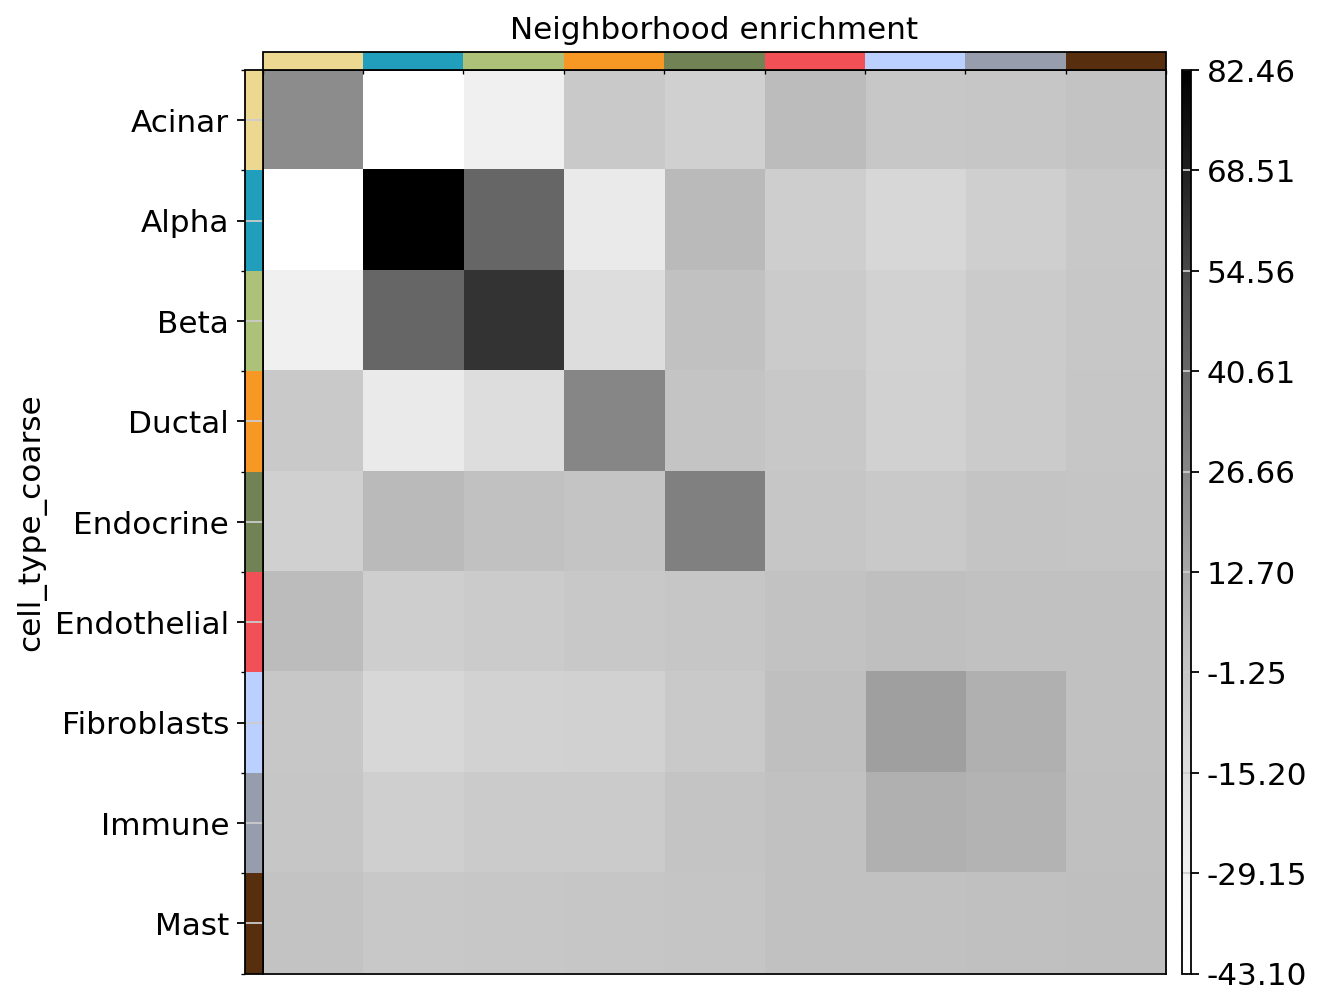

In [17]:
sq.pl.nhood_enrichment(adata, cluster_key='cell_type_coarse',cmap='Greys')

In [18]:
sq.gr.interaction_matrix(adata, cluster_key='cell_type_coarse',weights=True)

/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/squidpy/pl/_utils.py:557: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_labels = adata.obs[key][row_order]


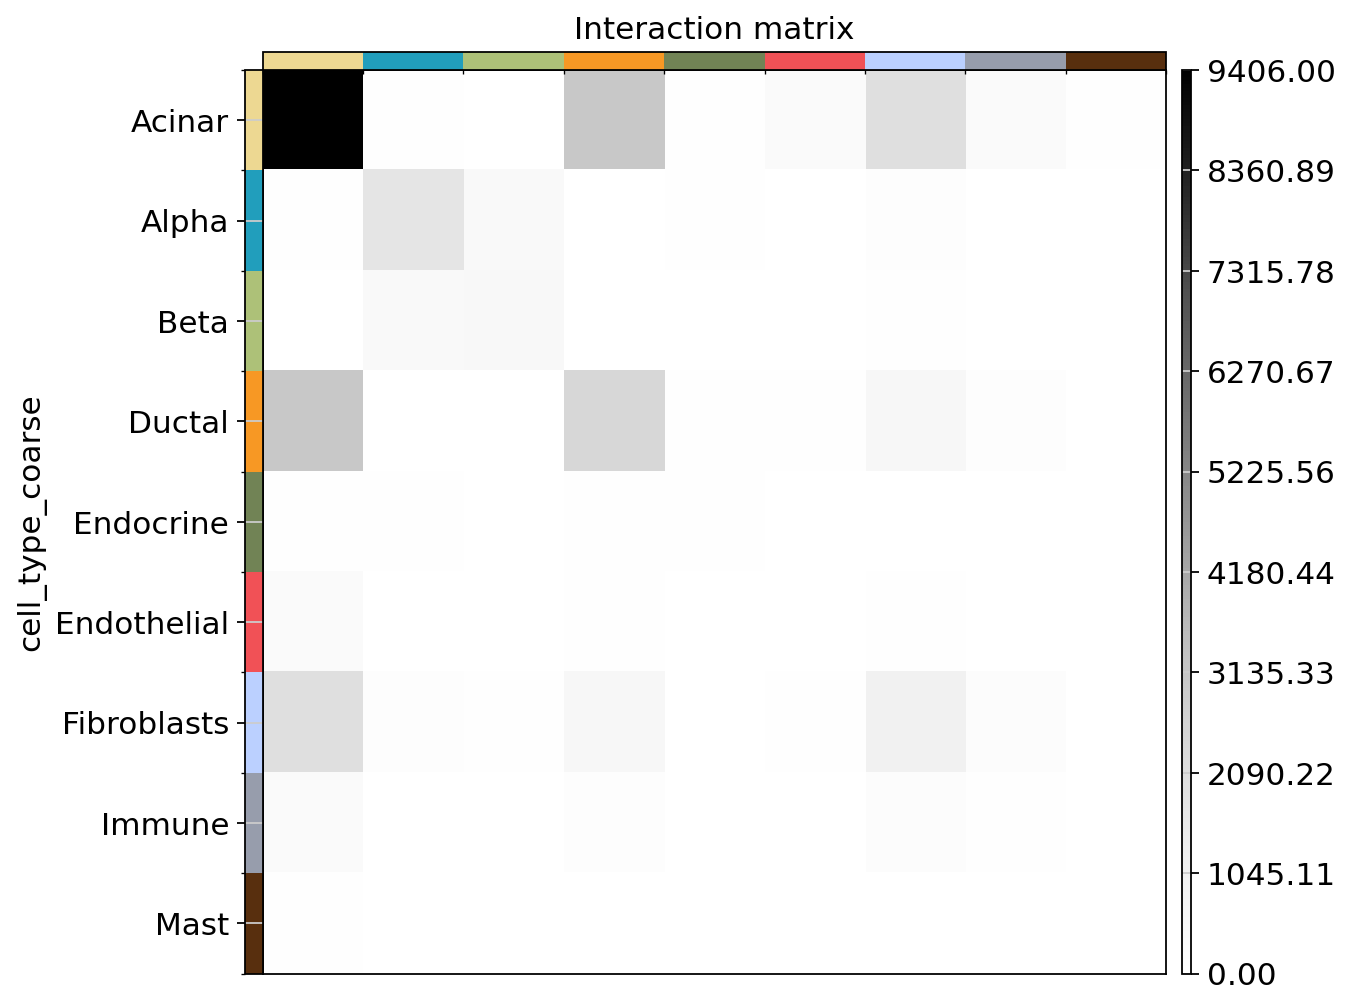

In [19]:
sq.pl.interaction_matrix(adata, cluster_key='cell_type_coarse',cmap='Greys')

### Compute Ripley’s statistics
The Ripley’s L function is a descriptive statistics generally used to determine whether points have a random, dispersed or clustered distribution pattern at certain scale.

/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/home/aih/sara.jimenez/miniconda3/envs/ncem/l

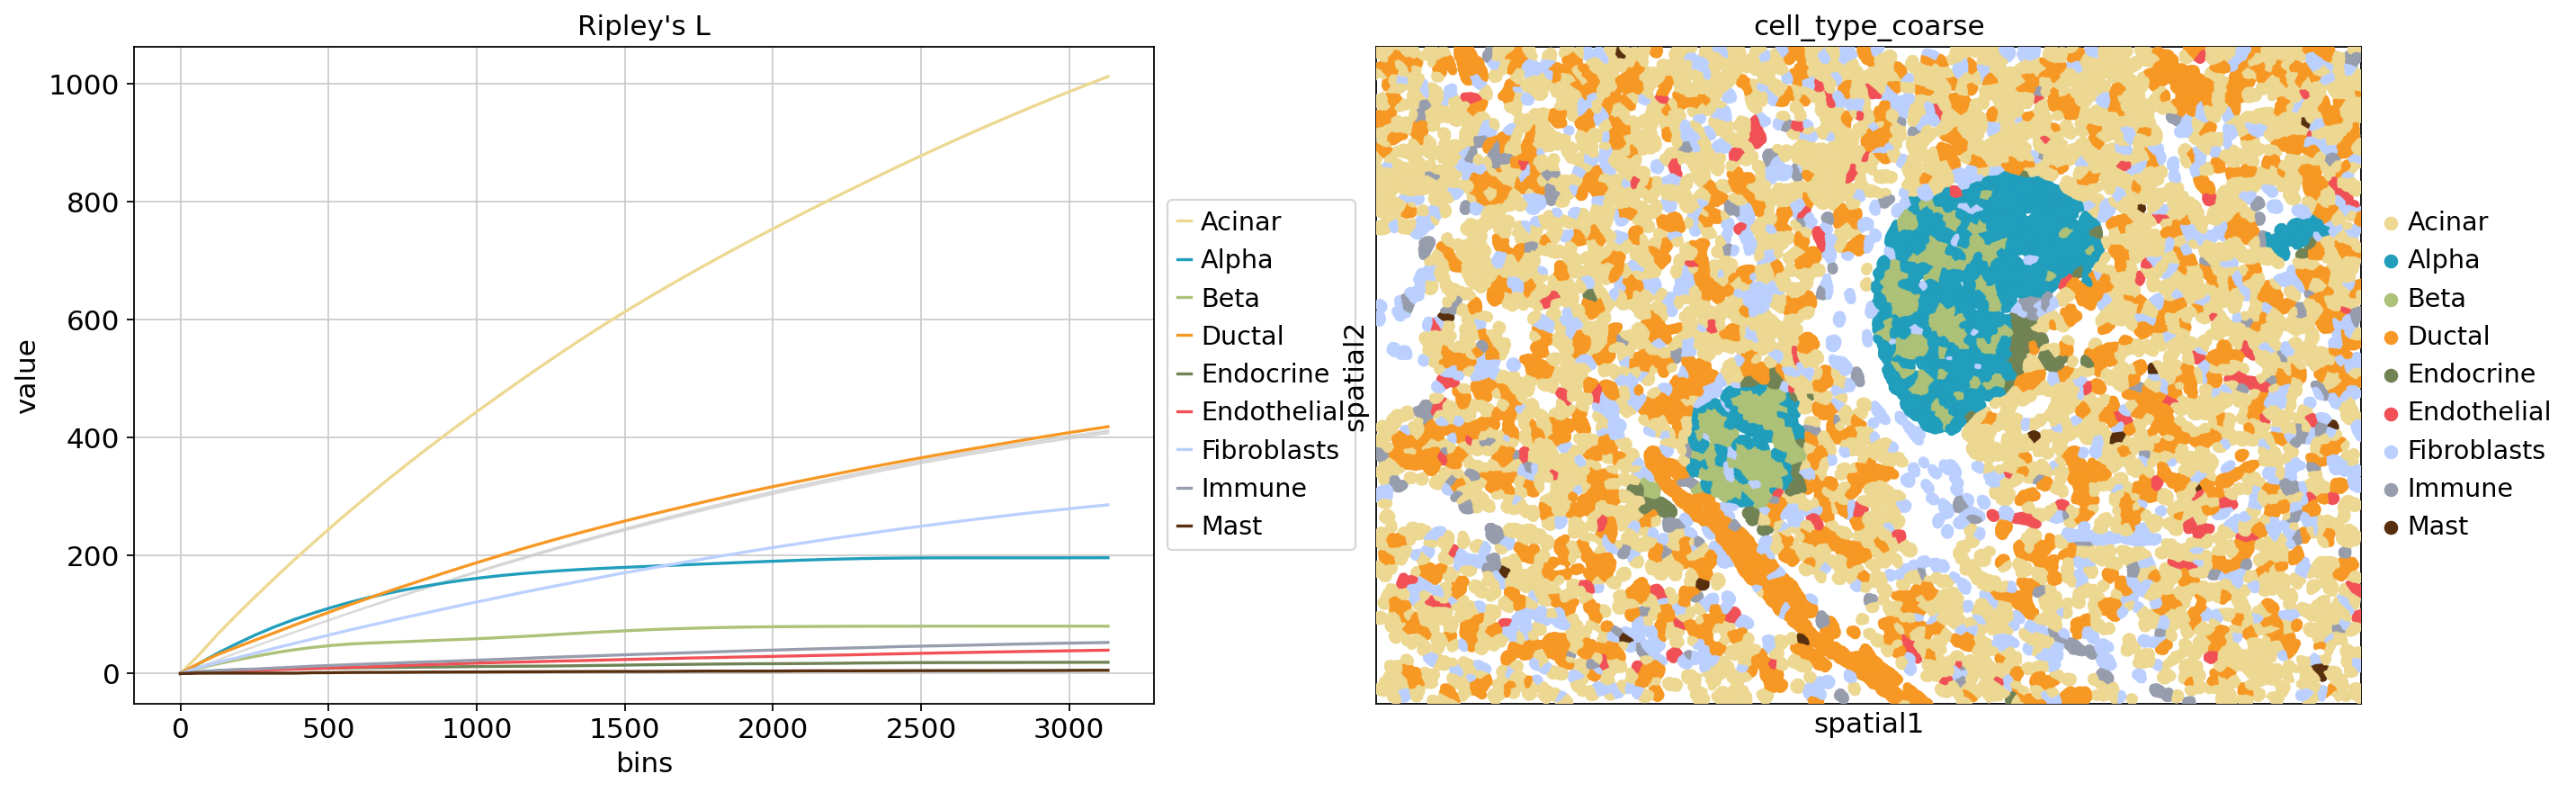

In [20]:
mode = "L"
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

sq.gr.ripley(adata, cluster_key="cell_type_coarse", mode=mode)
sq.pl.ripley(
    adata,
    cluster_key="cell_type_coarse",
    mode=mode,
    ax=ax[0],
)

sq.pl.spatial_segment(
    adata,
    shape="hex",
    color="cell_type_coarse",
    library_id="12",
    library_key="fov",
    seg_cell_id="cell_ID",
    img=False,
    size=60,
    ax=ax[1],
)

### Moran’s I score

The Moran’s I global spatial auto-correlation statistics evaluates whether features (i.e. genes) shows a pattern that is clustered, dispersed or random in the tissue are under consideration.

In [21]:
#sq.gr.spatial_neighbors(adata, coord_type="generic", delaunay=True)
sq.gr.spatial_autocorr(
    adata,
    mode="moran",
    n_perms=100,
    n_jobs=1,
)
adata.uns["moranI"].head(10)

100%|██████████| 100/100 [00:23<00:00,  4.22/s]


I  pval_norm  var_norm  pval_z_sim  pval_sim   var_sim  \
TTR     0.841436        0.0  0.000065         0.0  0.009901  0.000160   
GCG     0.813863        0.0  0.000065         0.0  0.009901  0.000157   
CHGA    0.765895        0.0  0.000065         0.0  0.009901  0.000137   
INS     0.757733        0.0  0.000065         0.0  0.009901  0.000109   
PRSS2   0.732667        0.0  0.000065         0.0  0.009901  0.000123   
REG1A   0.714490        0.0  0.000065         0.0  0.009901  0.000114   
CPB1    0.674632        0.0  0.000065         0.0  0.009901  0.000122   
SPINK1  0.551265        0.0  0.000065         0.0  0.009901  0.000102   
IAPP    0.515339        0.0  0.000065         0.0  0.009901  0.000064   
SCG5    0.422968        0.0  0.000065         0.0  0.009901  0.000097   

        pval_norm_fdr_bh  pval_z_sim_fdr_bh  pval_sim_fdr_bh  
TTR                  0.0                0.0         0.028015  
GCG                  0.0                0.0         0.028015  
CHGA                 0.0                0.0         0.028015  
INS                  0.0                0.0         0.028015  
PRSS2                0.0                0.0         0.028015  
REG1A                0.0                0.0         0.028015  
CPB1                 0.0                0.0         0.028015  
SPINK1               0.0                0.0         0.028015  
IAPP                 0.0                0.0         0.028015  
SCG5                 0.0                0.0         0.028015

In [29]:
adata.uns["moranI"].head(10).index.values

array(['TTR', 'GCG', 'CHGA', 'INS', 'PRSS2', 'REG1A', 'CPB1', 'SPINK1',
       'IAPP', 'SCG5'], dtype=object)

In [31]:
adata.obs.cell_type_coarse.value_counts()

cell_type_coarse
Acinar         2580
Ductal         1059
Fibroblasts     702
Alpha           411
Beta            168
Immune          134
Endothelial      98
Endocrine        41
Mast             15
Name: count, dtype: int64

/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


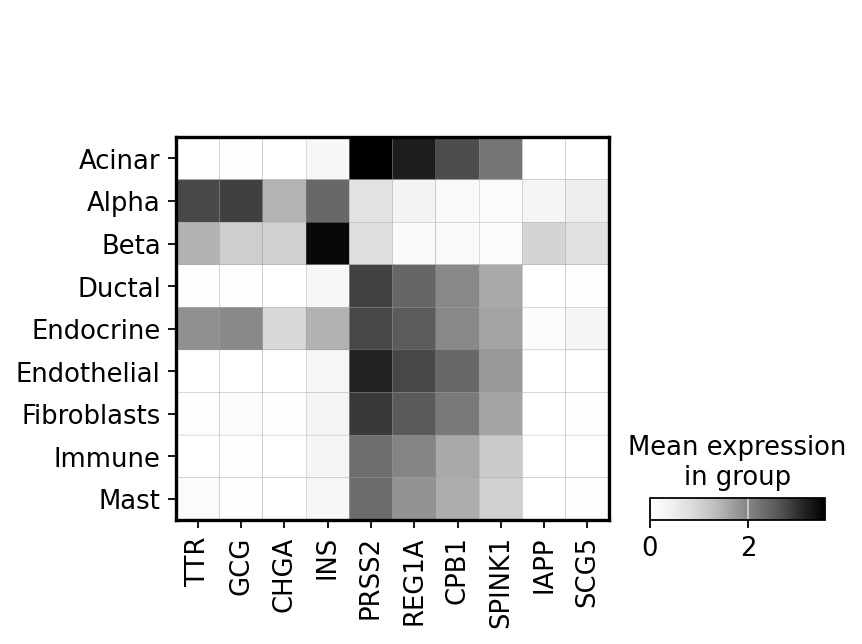

In [35]:
sc.pl.matrixplot(adata, adata.uns["moranI"].head(10).index.values, groupby='cell_type_coarse', cmap='Greys')
#mp.add_totals().style(edge_color='black').show()


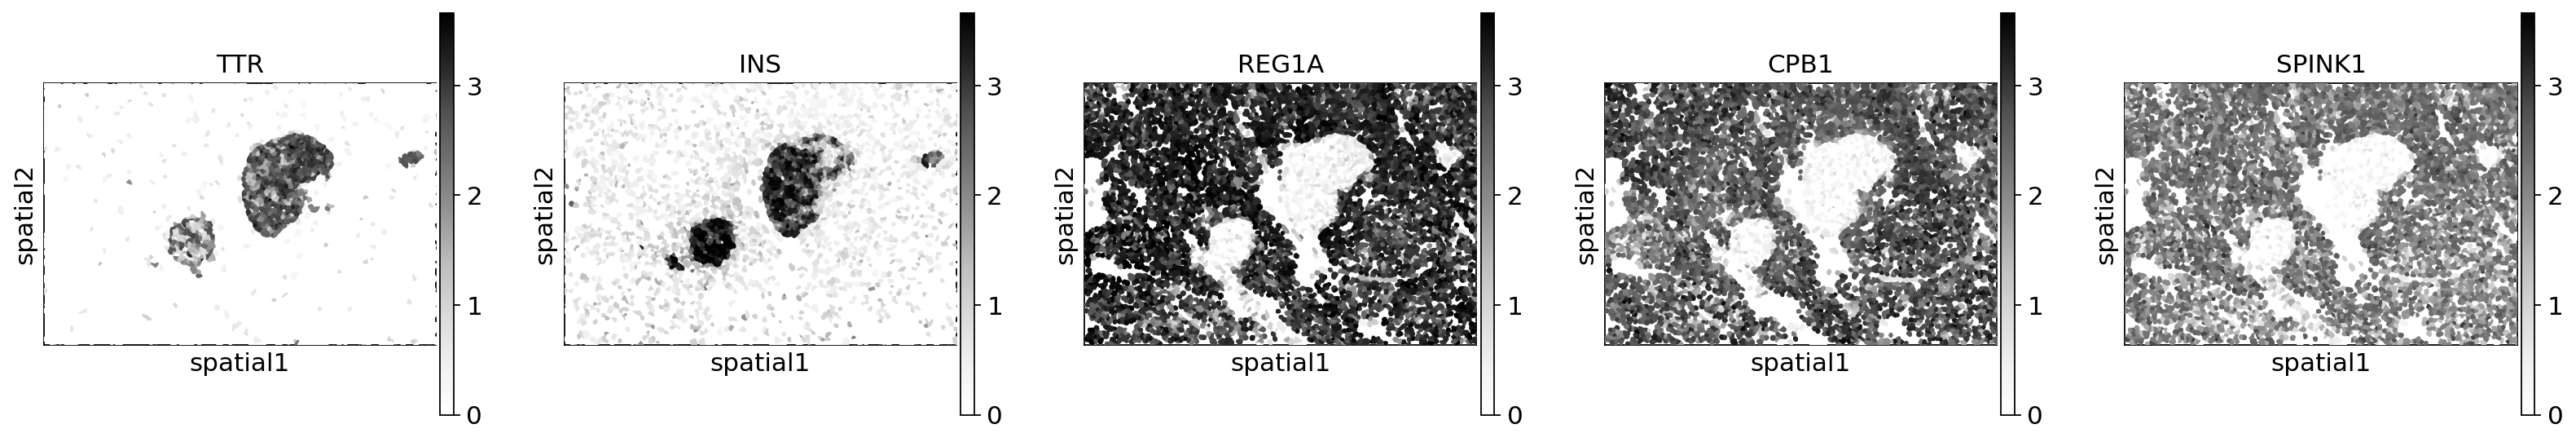

In [38]:
sq.pl.spatial_segment(
    adata,
    library_id="12",
    seg_cell_id="cell_ID",
    library_key="fov",
    color=["TTR", "INS", 'REG1A',"CPB1","SPINK1"],
    size=60,ncols=5,
    img=False,cmap="Greys"
)

### Ligand receptor analysis

In [37]:
sq.gr.ligrec(adata,cluster_key='cell_type_coarse',use_raw=False, alpha=0.005)

/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  File "/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/urllib3/connectionpool.py", line 715, in urlopen
    httplib_response = self._make_request(
  File "/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/urllib3/connectionpool.py", line 404, in _make_request
    self._validate_conn(conn)
  File "/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/urllib3/connectionpool.py", line 1058, in _validate_conn
    conn.connect()
  File "/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/urllib3/connection.py", line 419, in connect
    self.sock = ssl_wrap_socket(
  File "/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-p

/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/squidpy/pl/_ligrec.py:306: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  for cls, size in (pvals.groupby(level=0, axis=1)).size().to_dict().items():
/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/scanpy/plotting/_baseplot_class.py:121: UserWarning: Over 500 categories found. Plot would be very large.
  warn(
/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


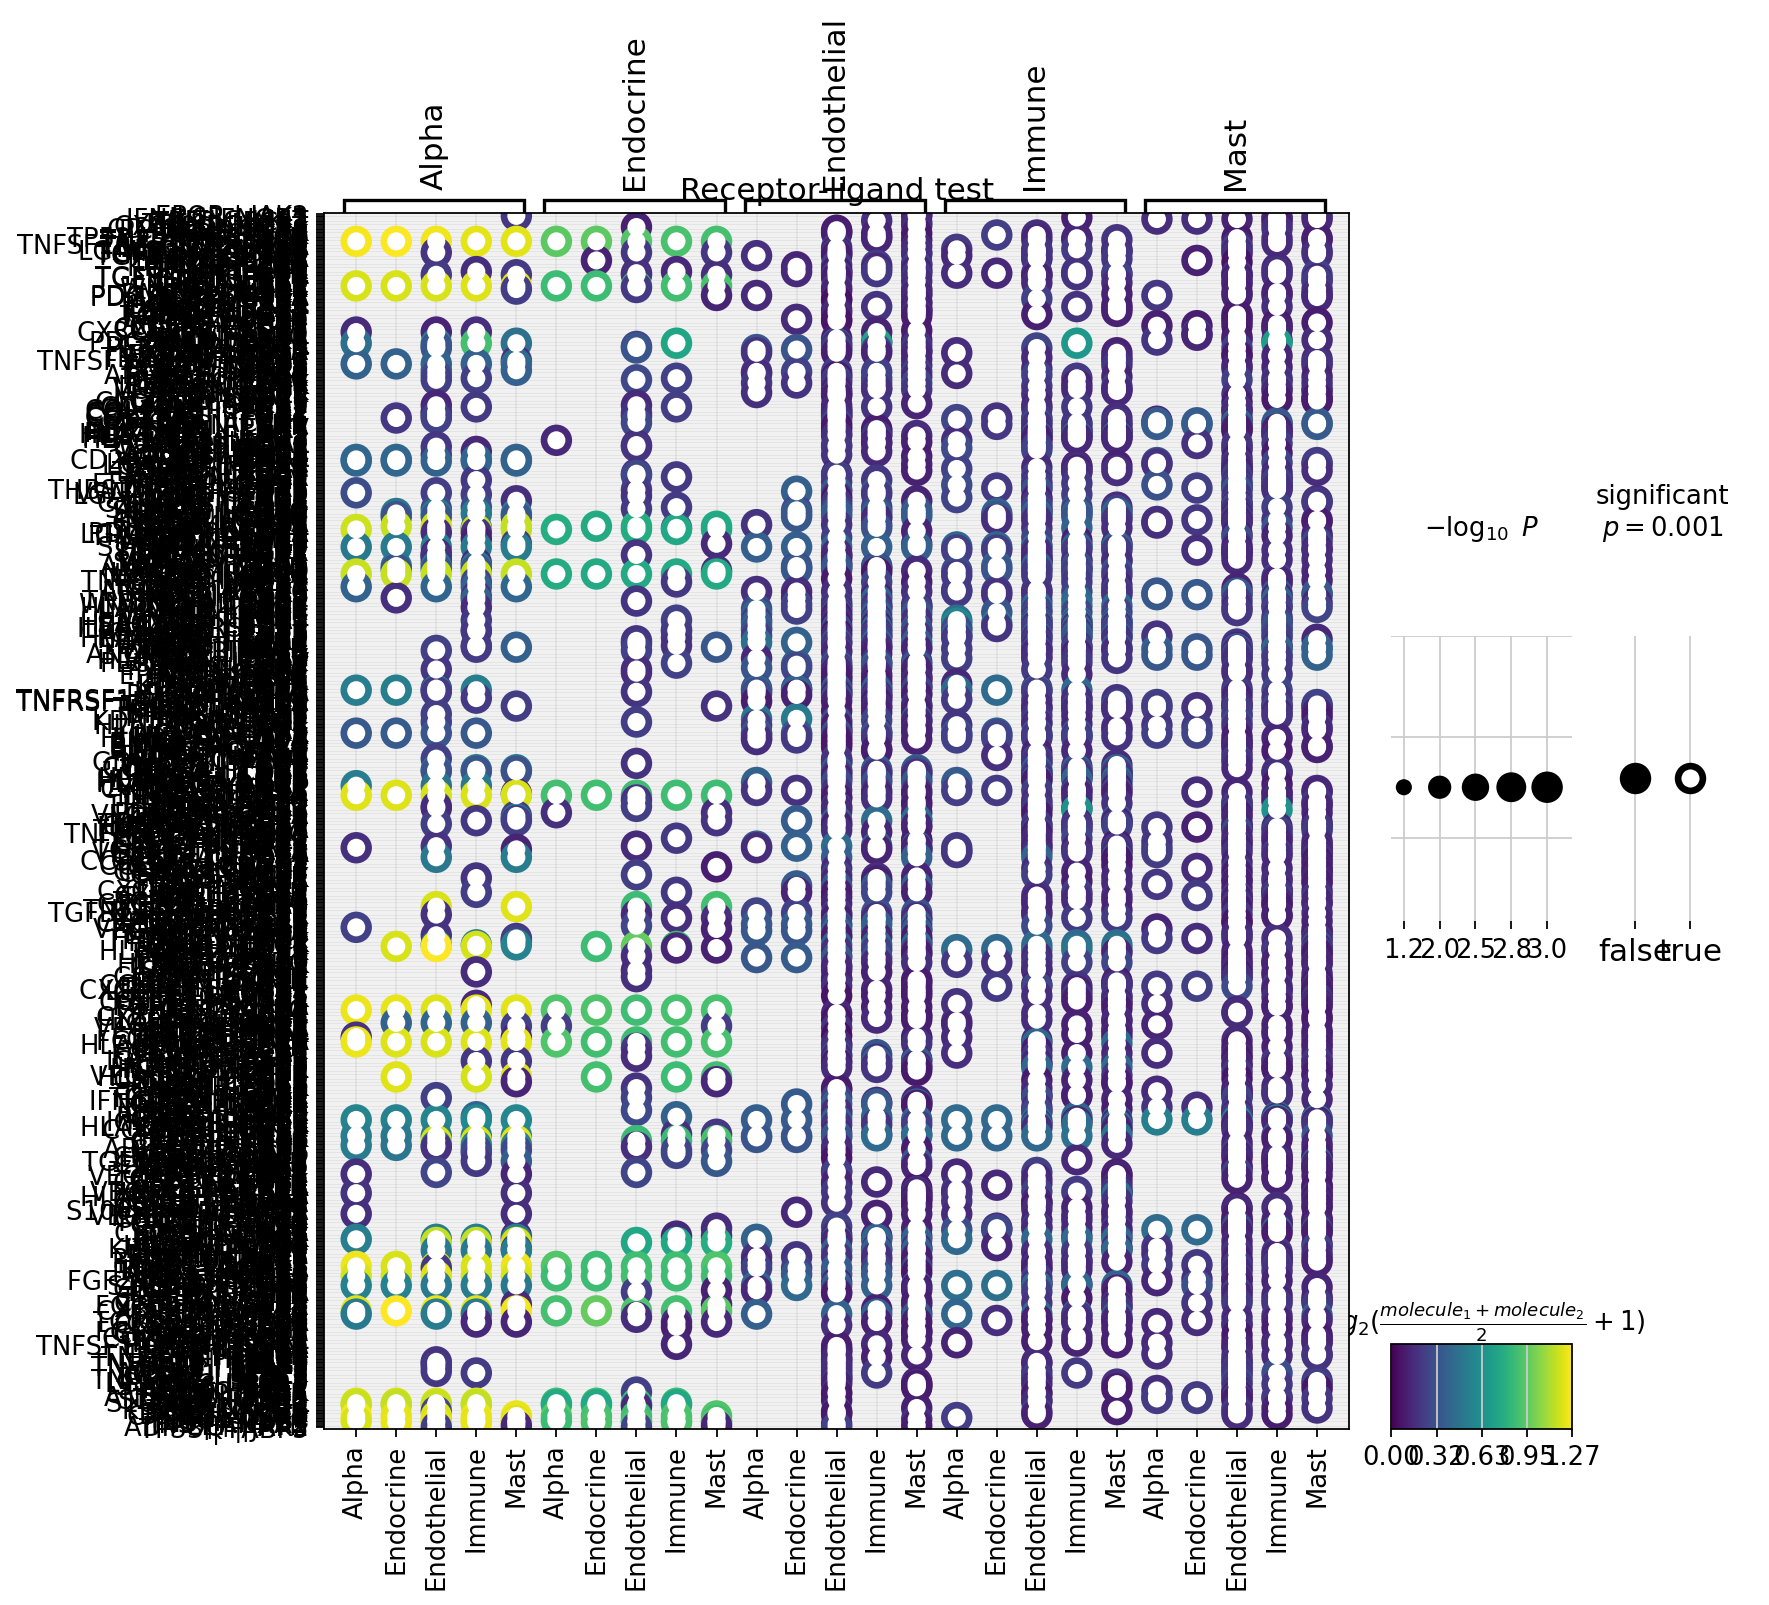

In [38]:
sq.pl.ligrec(adata, cluster_key='cell_type_coarse',pvalue_threshold=0.0001,
             remove_nonsig_interactions=True, remove_empty_interactions=True,figsize = (10,10))

### NCEM

In [17]:
from ncem.tl.fit.glm import linear_ncem

In [ ]:
linear_ncem

In [18]:
adata = linear_ncem(adata=adata, key_type='cell_type_coarse', key_graph='spatial_connectivities')

/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [19]:
adata.obs['cell_type_coarse'].cat.categories

Index(['Acinar', 'Alpha', 'Beta', 'Ductal', 'Endocrine', 'Endothelial',
       'Fibroblasts', 'Immune', 'Mast'],
      dtype='object')

In [20]:
adata

AnnData object with n_obs × n_vars = 5208 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse'
    var: 'NegPrb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'log1p', 'spatial', 'cell_type_coarse_colors', 'spatial_neighbors', 'cell_type_coarse_nhood_enrichment', 'cell_type_coarse_interactions', 'cell_type_coarse_ripley_L', 'moranI', 'ncem'
    obsm: 'spatial', 'sp

#### Exploring interesting interactions

In [21]:
adata.varm['ncem_params']

index_Acinar  index_Alpha  index_Beta  index_Ductal  \
AATK          0.069728    -0.048840    0.111047      0.041405   
ABL1          0.031387    -0.055774    0.040607      0.094595   
ABL2          0.105367     0.073098    0.033578      0.016362   
ACE           0.001223     0.009378    0.051176     -0.004102   
ACE2         -0.004731     0.034703    0.058374      0.049573   
...                ...          ...         ...           ...   
NegPrb19      0.031908     0.008829   -0.002683      0.034553   
NegPrb20     -0.010607     0.048128   -0.019710      0.080927   
NegPrb21     -0.002807    -0.014533   -0.018949     -0.010227   
NegPrb22     -0.003950    -0.012328   -0.018153     -0.001278   
NegPrb23      0.000655     0.017203    0.004516     -0.007993   

          index_Endocrine  index_Endothelial  index_Fibroblasts  index_Immune  \
AATK         1.203181e-02      -6.347552e-02           0.026980     -0.038053   
ABL1        -1.047814e-01       5.658607e-02           0.132084     -0.111596   
ABL2         1.045810e-01       1.321054e-01           0.061379      0.087657   
ACE          3.722463e-02       6.056416e-03           0.053047      0.014649   
ACE2         5.293811e-15      -1.585444e-02           0.059388      0.030084   
...                   ...                ...                ...           ...   
NegPrb19    -1.758198e-02       2.032785e-02           0.020545      0.025483   
NegPrb20     1.675277e-01      -4.501546e-02           0.014842      0.047084   
NegPrb21     2.678422e-15       2.742458e-16           0.004620     -0.073090   
NegPrb22     1.184229e-01       3.156905e-02           0.011394      0.000208   
NegPrb23     1.104634e-15      -8.890650e-02           0.014661     -0.007756   

            index_Mast  index_Acinar:neighbor_Acinar  ...  \
AATK      4.460565e-15                     -0.037848  ...   
ABL1     -2.268871e-02                     -0.003558  ...   
ABL2      3.229230e-02                      0.033326  ...   
ACE       1.241112e-15                      0.008577  ...   
ACE2      2.479155e-15                      0.016260  ...   
...                ...                           ...  ...   
NegPrb19  4.963194e-16                     -0.015312  ...   
NegPrb20  2.093794e-02                      0.028095  ...   
NegPrb21 -2.082258e-16                      0.011207  ...   
NegPrb22 -1.047955e-02                      0.023454  ...   
NegPrb23  1.807869e-15                      0.008209  ...   

          index_Mast:neighbor_Immune  index_Acinar:neighbor_Mast  \
AATK                   -1.563694e-15                    0.010252   
ABL1                    1.432971e-01                    0.007037   
ABL2                   -6.777754e-02                    0.013433   
ACE                    -4.038814e-16                   -0.009256   
ACE2                   -1.736571e-15                   -0.007070   
...                              ...                         ...   
NegPrb19               -7.216521e-16                   -0.005072   
NegPrb20               -1.699668e-01                    0.041001   
NegPrb21               -2.017283e-16                    0.004745   
NegPrb22               -9.431596e-02                   -0.004698   
NegPrb23               -3.847378e-16                   -0.009371   

          index_Alpha:neighbor_Mast  index_Beta:neighbor_Mast  \
AATK                            0.0                       0.0   
ABL1                            0.0                       0.0   
ABL2                            0.0                       0.0   
ACE                             0.0                       0.0   
ACE2                            0.0                       0.0   
...                             ...                       ...   
NegPrb19                        0.0                       0.0   
NegPrb20                        0.0                       0.0   
NegPrb21                        0.0                       0.0   
NegPrb22                        0.0                     

In [22]:
#df = pd.DataFrame(np.sum(np.absolute(adata.varm['ncem_fdr_pvals']<0.05)))
df = pd.DataFrame(np.sum(np.absolute(adata.varm['ncem_params'])))
df_int = pd.DataFrame(columns=adata.obs['cell_type_coarse'].cat.categories, index=adata.obs['cell_type_coarse'].cat.categories,dtype=float)
for s in adata.obs['cell_type_coarse'].cat.categories:
    for r in adata.obs['cell_type_coarse'].cat.categories: 
        index_value = 'index_'+s+':neighbor_'+r
        df_int.at[s,r] = df.loc[index_value][0]
df_int

/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Acinar         Alpha          Beta     Ductal     Endocrine  \
Acinar       27.137916  1.965736e+01  4.718686e+01   4.952240  1.768389e+01   
Alpha        21.940417  1.034882e+02  1.555293e+01  34.510080  2.343242e+01   
Beta         65.041492  3.237673e+01  4.893179e+01  61.524156  4.505856e+01   
Ductal       36.495459  3.941339e+01  6.902036e+01  18.802057  2.676492e+01   
Endocrine    45.686379  4.044238e+01  4.609218e+01  46.910404  4.106281e+01   
Endothelial  92.584526  9.127397e+01  5.400184e+01  30.226988  5.400184e+01   
Fibroblasts  34.317404  3.351218e+01  4.865271e+01  13.619950  4.911524e+01   
Immune       62.457976  6.529590e+01  1.035115e+02  29.912404  7.017423e+01   
Mast         38.941560  7.071246e-13  1.164373e-13  62.332216  2.086533e-13   

             Endothelial  Fibroblasts     Immune       Mast  
Acinar          6.771904     4.660144   7.975539  16.799274  
Alpha          42.100777    13.150306  32.580719   0.000000  
Beta           71.278916    22.412085  69.890257   0.000000  
Ductal         15.164993     8.868854  14.970792  41.327587  
Endocrine      87.824294    41.548583  57.568079   0.000000  
Endothelial    42.644476    28.935607  36.655100  72.451714  
Fibroblasts    16.841386    16.776459  17.960561  37.152618  
Immune         38.772878    33.081229  28.421616  64.370805  
Mast           70.486817    81.041950  74.924365  85.986332

In [23]:
import seaborn as sns

<Axes: >

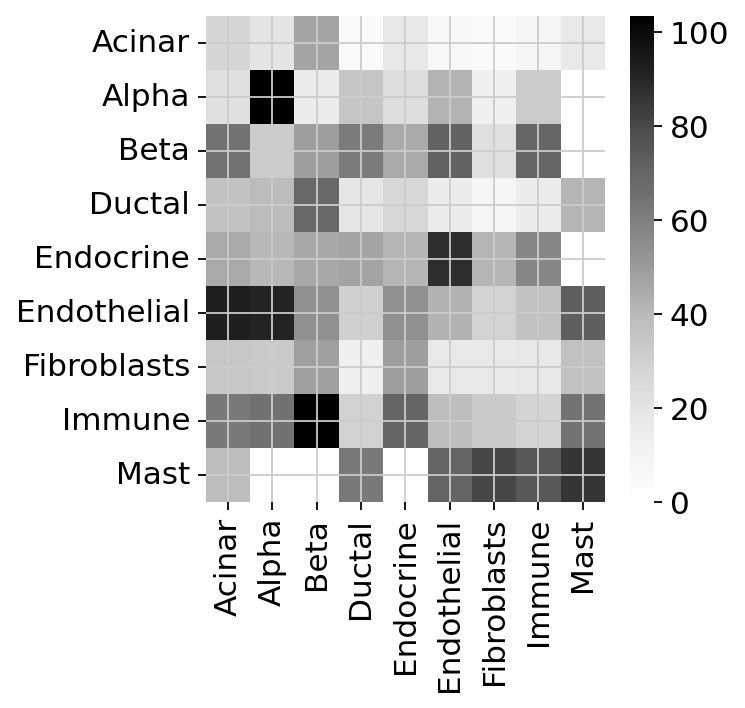

In [24]:
sns.heatmap(
            df_int,
            cmap="Greys",
        )

In [52]:
interactions = [
    'index_Mast:neighbor_Beta',
    'index_Mast:neighbor_Alpha'   
]

/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


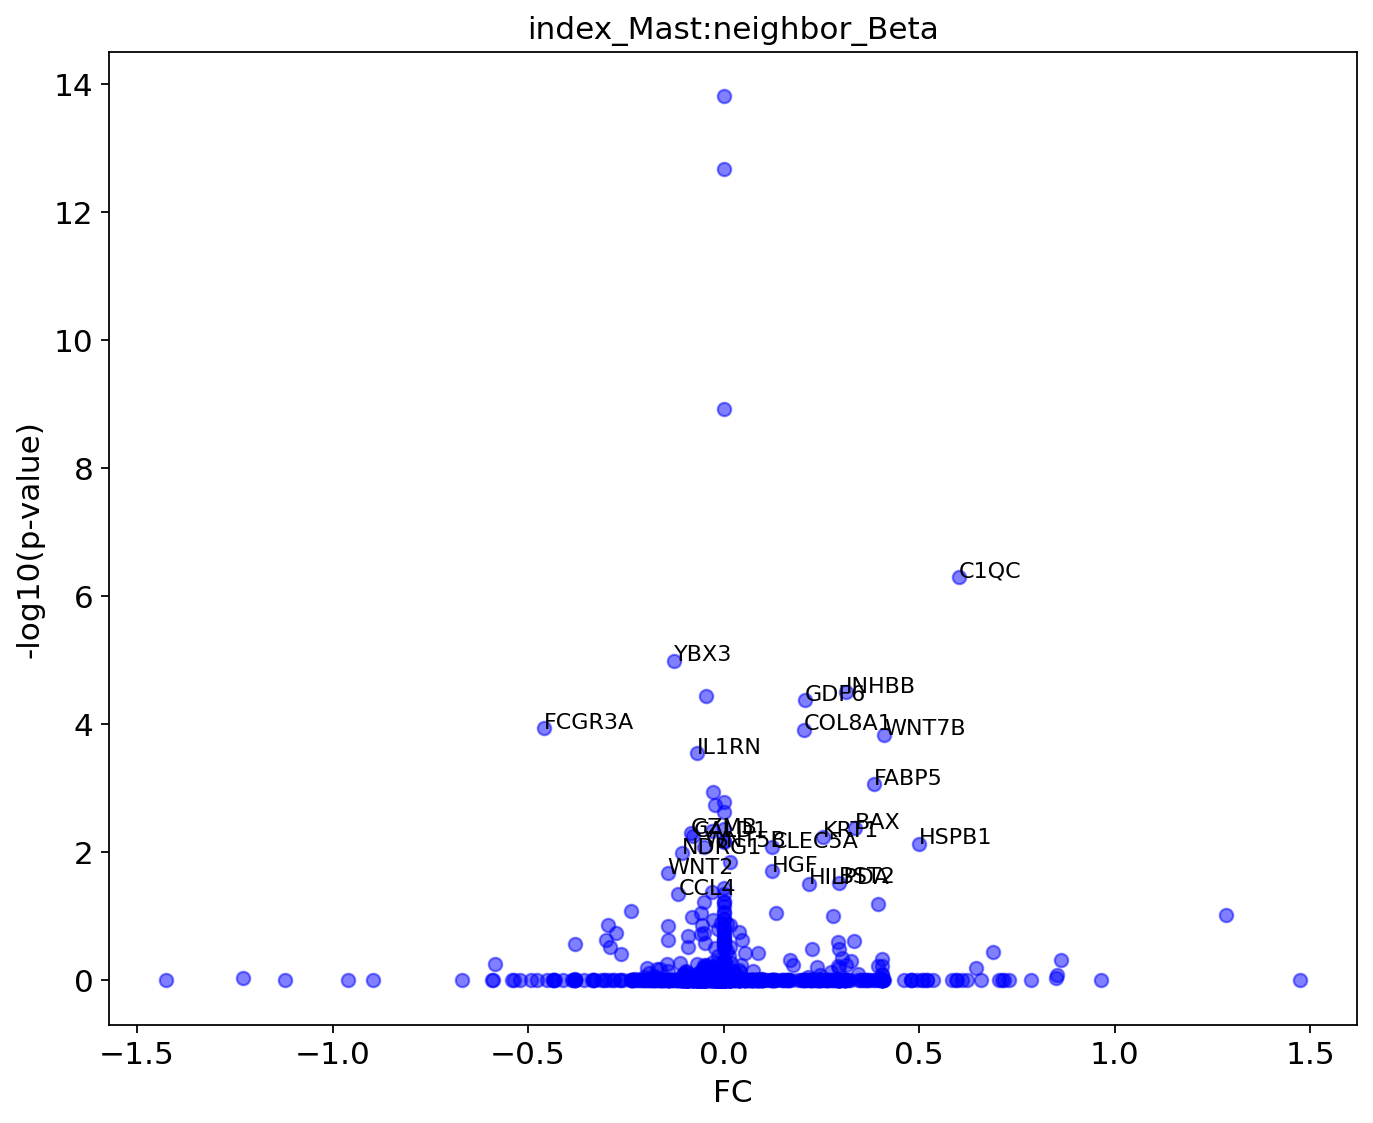

/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


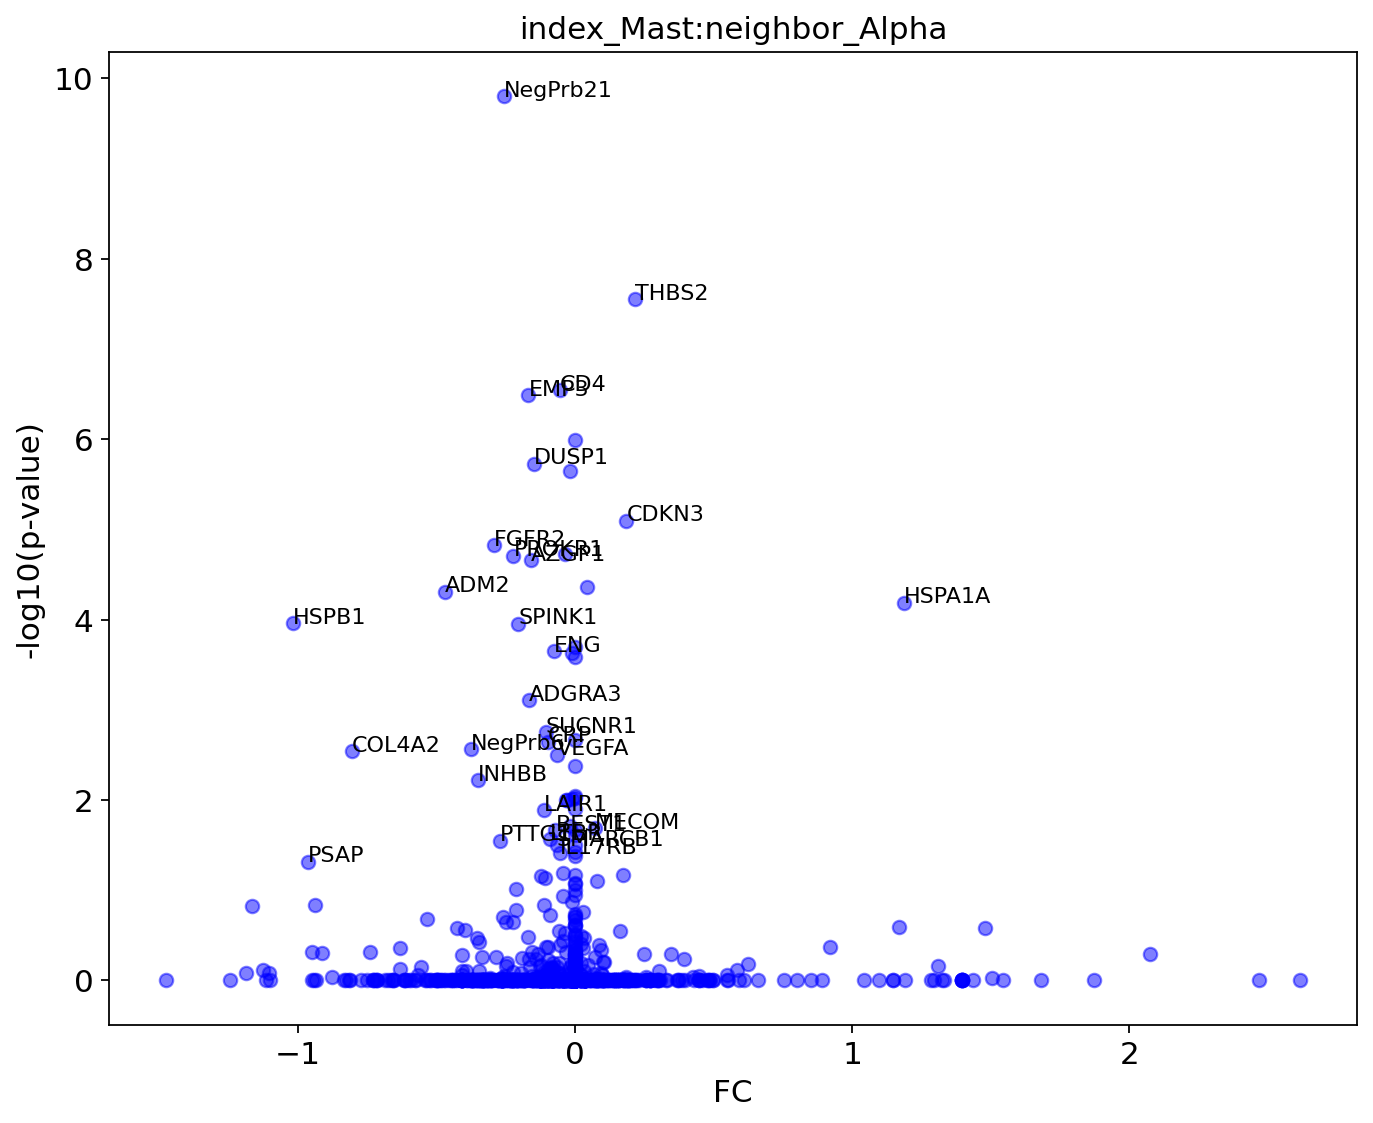

In [53]:
for c in interactions:
    data_df = {
        'log2FoldChange' : adata.varm['ncem_params'][c],
        'padj' : adata.varm['ncem_fdr_pvals'][c],
        'symbol' : np.array(adata.varm['ncem_fdr_pvals'].index)
    }
    
    df = pd.DataFrame(data_df)
    
    df['-log10(p_value)'] = -np.log10(df['padj'])
    

    plt.figure(figsize=(10, 8))
    plt.scatter(df['log2FoldChange'], df['-log10(p_value)'], color='blue', alpha=0.5)
    
    # Label the most significant points
    threshold_logFC = 0.05  # Adjust as needed
    threshold_p_value = 0.05  # Adjust as needed
    significant_points = df[(abs(df['log2FoldChange']) >= threshold_logFC) & (df['padj'] <= threshold_p_value)]
    for i, point in significant_points.iterrows():
        plt.text(point['log2FoldChange'], point['-log10(p_value)'], point['symbol'], fontsize=10)
        #volcano(df)
        
    # Add labels and title
    plt.xlabel('FC')
    plt.ylabel('-log10(p-value)')
    plt.title(c)
    
    # Show plot
    plt.grid(False)
    plt.show()

In [54]:
df

log2FoldChange          padj    symbol  -log10(p_value)
AATK       -1.106429e-01  1.000000e+00      AATK        -0.000000
ABL1       -1.049435e-01  1.000000e+00      ABL1        -0.000000
ABL2       -1.369376e-01  1.000000e+00      ABL2        -0.000000
ACE         7.915914e-02  1.000000e+00       ACE        -0.000000
ACE2       -1.414238e-14  1.000000e+00      ACE2        -0.000000
...                  ...           ...       ...              ...
NegPrb19    1.396051e+00  1.000000e+00  NegPrb19        -0.000000
NegPrb20   -1.871983e-02  7.150135e-01  NegPrb20         0.145686
NegPrb21   -2.549424e-01  1.565416e-10  NegPrb21         9.805370
NegPrb22   -2.213486e-14  1.000000e+00  NegPrb22        -0.000000
NegPrb23   -5.558260e-01  7.111726e-01  NegPrb23         0.148025

[979 rows x 4 columns]

In [55]:
#significant_points = df[(abs(df['log2FoldChange']) >= threshold_logFC) & (df['padj'] <= threshold_p_value)]
significant_points

log2FoldChange          padj     symbol  -log10(p_value)
ADGRA3          -0.165225  7.891279e-04     ADGRA3         3.102853
ADM2            -0.468173  4.900480e-05       ADM2         4.309761
AZGP1           -0.157572  2.200083e-05      AZGP1         4.657561
BEST1           -0.070677  2.163455e-02      BEST1         1.664852
CD4             -0.055840  2.878760e-07        CD4         6.540795
CD63             1.166994  0.000000e+00       CD63              inf
CD68            -0.409131  0.000000e+00       CD68              inf
CD79A           -0.262366  0.000000e+00      CD79A              inf
CD80             0.213442  0.000000e+00       CD80              inf
CD81             1.360324  0.000000e+00       CD81              inf
CD84            -0.394801  0.000000e+00       CD84              inf
CD9             -0.158247  0.000000e+00        CD9              inf
CDKN3            0.185145  8.016383e-06      CDKN3         5.096022
COL4A2          -0.805411  2.862283e-03     COL4A2         2.543287
CRP             -0.098550  2.257738e-03        CRP         2.646326
DUSP1           -0.146638  1.879535e-06      DUSP1         5.725950
EMP3            -0.167802  3.260053e-07       EMP3         6.486775
ENG             -0.074560  2.241494e-04        ENG         3.649462
FGFR2           -0.292154  1.506107e-05      FGFR2         4.822144
HSPA1A           1.185745  6.502841e-05     HSPA1A         4.186897
HSPB1           -1.017275  1.099657e-04      HSPB1         3.958743
IL17RB          -0.055840  3.892967e-02     IL17RB         1.409719
INHBB           -0.349067  6.081653e-03      INHBB         2.215978
ITGB5            0.172296  0.000000e+00      ITGB5              inf
JAG1             0.106763  0.000000e+00       JAG1              inf
JAK1            -0.346378  0.000000e+00       JAK1              inf
JAK2             0.255950  0.000000e+00       JAK2              inf
LAIR1           -0.110643  1.298468e-02      LAIR1         1.886569
LTBR            -0.090548  2.722002e-02       LTBR         1.565112
MECOM            0.072099  2.046048e-02      MECOM         1.689084
PROKR1          -0.222160  1.960015e-05     PROKR1         4.707741
PSAP            -0.963623  4.815189e-02       PSAP         1.317387
PTTG1           -0.272041  2.840808e-02      PTTG1         1.546558
SMARCB1         -0.065515  3.163901e-02    SMARCB1         1.499777
SPINK1          -0.204254  1.106030e-04     SPINK1         3.956233
SUCNR1          -0.104944  1.771626e-03     SUCNR1         2.751628
THBS2            0.216147  2.795928e-08      THBS2         7.553474
TNFRSF13B       -0.123404  0.000000e+00  TNFRSF13B              inf
VEGFA           -0.065515  3.158695e-03      VEGFA         2.500492
NegPrb6         -0.375702  2.750311e-03    NegPrb6         2.560618
NegPrb21        -0.254942  1.565416e-10   NegPrb21         9.805370

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()
/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()
/home/aih/sara.jime

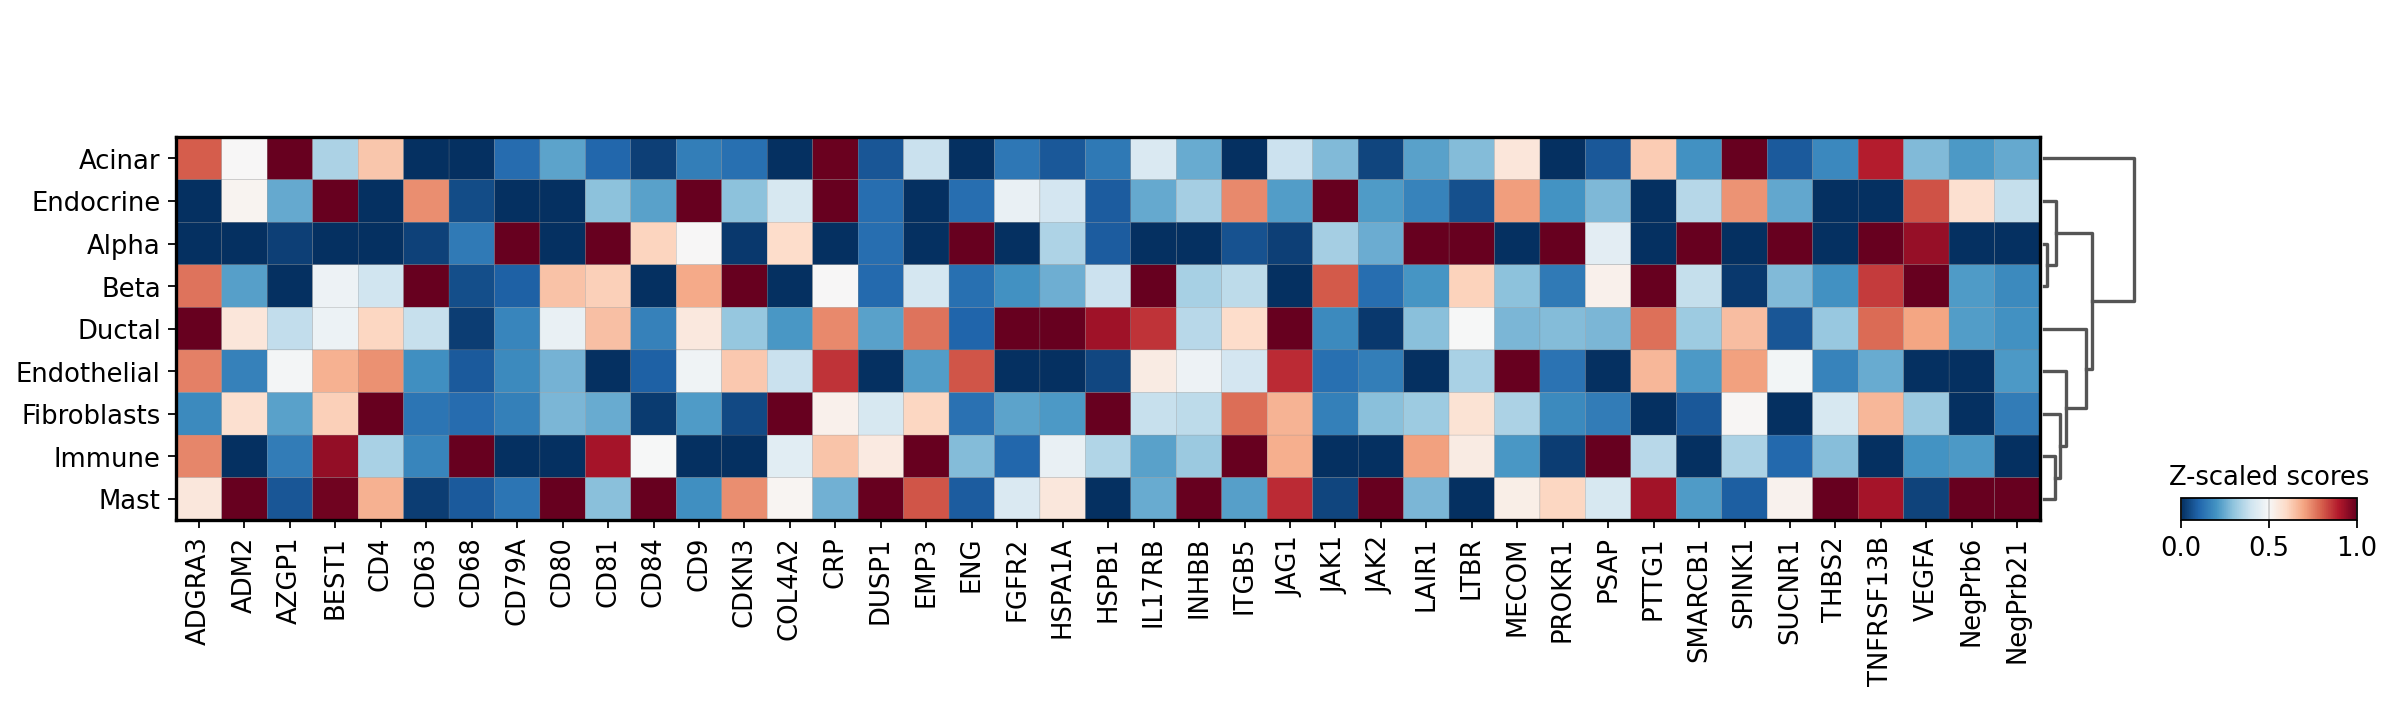

In [57]:
sc.pl.matrixplot(adata, significant_points['symbol'], 'cell_type_coarse', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r')

In [64]:
adata_ncem = adata[:,np.isin(adata.var_names,significant_points['symbol'])].copy()
adata_ncem

AnnData object with n_obs × n_vars = 4423 × 41
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse'
    var: 'NegPrb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'log1p', 'spatial', 'cell_type_coarse_colors', 'spatial_neighbors', 'cell_type_coarse_nhood_enrichment', 'cell_type_coarse_interactions', 'cell_type_coarse_ripley_L', 'moranI', 'cell_type_coarse_ligrec', 'ncem

In [68]:
adata_ncem.varm['ncem_fdr_pvals']['index_Mast:neighbor_Alpha']

ADGRA3       7.891279e-04
ADM2         4.900480e-05
AZGP1        2.200083e-05
BEST1        2.163455e-02
CD4          2.878760e-07
CD63         0.000000e+00
CD68         0.000000e+00
CD79A        0.000000e+00
CD80         0.000000e+00
CD81         0.000000e+00
CD84         0.000000e+00
CD9          0.000000e+00
CDKN3        8.016383e-06
COL4A2       2.862283e-03
CRP          2.257738e-03
DUSP1        1.879535e-06
EMP3         3.260053e-07
ENG          2.241494e-04
FGFR2        1.506107e-05
HSPA1A       6.502841e-05
HSPB1        1.099657e-04
IL17RB       3.892967e-02
INHBB        6.081653e-03
ITGB5        0.000000e+00
JAG1         0.000000e+00
JAK1         0.000000e+00
JAK2         0.000000e+00
LAIR1        1.298468e-02
LTBR         2.722002e-02
MECOM        2.046048e-02
PROKR1       1.960015e-05
PSAP         4.815189e-02
PTTG1        2.840808e-02
SMARCB1      3.163901e-02
SPINK1       1.106030e-04
SUCNR1       1.771626e-03
THBS2        2.795928e-08
TNFRSF13B    0.000000e+00
VEGFA       

In [65]:
adata_ncem.X = adata_ncem.varm['ncem_fdr_pvals']
adata_ncem

ValueError: Data matrix has wrong shape (41, 81), need to be (4423, 41).

In [58]:
alpha = 0.0001
np.sum(adata.varm['ncem_fdr_pvals'] < alpha) # and then sort

/home/aih/sara.jimenez/miniconda3/envs/ncem/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


index_Acinar:neighbor_Acinar       21
index_Alpha:neighbor_Acinar        19
index_Beta:neighbor_Acinar         33
index_Ductal:neighbor_Acinar       23
index_Endocrine:neighbor_Acinar    29
                                   ..
index_Endocrine:neighbor_Mast      19
index_Endothelial:neighbor_Mast    32
index_Fibroblasts:neighbor_Mast    21
index_Immune:neighbor_Mast         27
index_Mast:neighbor_Mast           24
Length: 81, dtype: int64

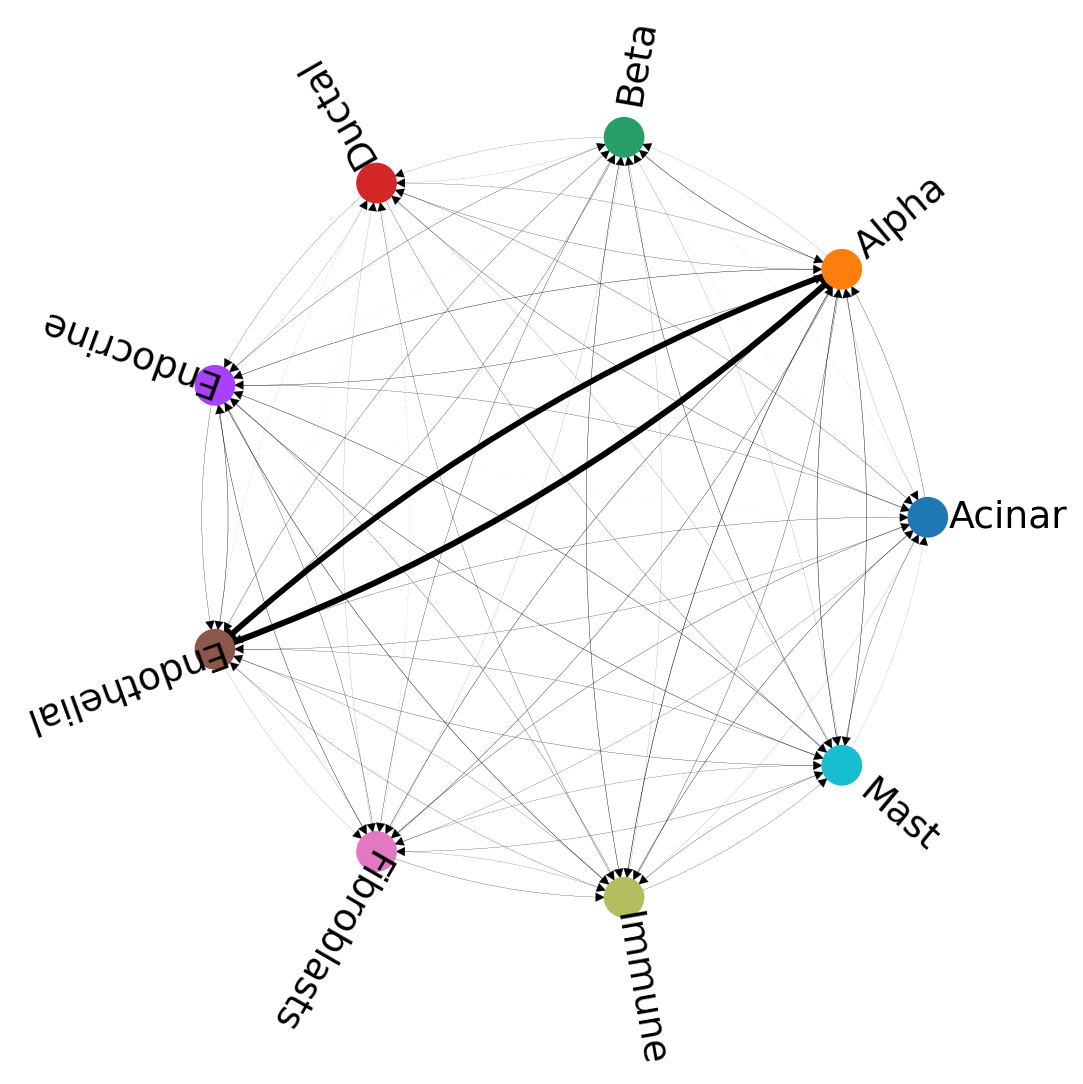

In [62]:
from ncem.pl.type_couplings import circular_rotated_labels
circular_rotated_labels(
    adata, 
    alpha=0.0001, # alpha is threshold when a p-value is considered significant (either 0.01, 0.05, 0.1)
    figsize=(7,7), 
    scale_edge=.1, 
    params_key='ncem_params', 
    pvals_key='ncem_fdr_pvals', 
    edge_type='magnitude', # de_genes ior magnitude
    clip_edges=15 # this value is for plotting reasons --> smaller = more arrows
)

In [ ]:
circular_rotated_labels

In [ ]:
adata.obs.cell_type.cat.categories

In [ ]:
nc.pl.noise_structure(adata,cluster_key='cell_type',figsize=(15,15))

In [ ]:
nc.pl.cluster_freq(adata, cluster_key='cell_type')